Below is the dataset from _A Little Book of R for Time Serie_ by Avril Coghlan, the author reads in a classic data set describing the total annual rainfall recorded during the years 1813-1912, values measured in inches, for London, England. 

In [5]:
rain.data <- c(23.56,26.07,21.86,31.24,23.65,23.88,
26.41,22.67,31.69,23.86,24.11,32.43,
23.26,22.57,23.00,27.88,25.32,25.08,
27.76,19.82,24.78,20.12,24.34,27.42,
19.44,21.63,27.49,19.43,31.13,23.09,
25.85,22.65,22.75,26.36,17.70,29.81,
22.93,19.22,20.63,35.34,25.89,18.65,
23.06,22.21,22.18,18.77,28.21,32.24,
22.27,27.57,21.59,16.93,29.48,31.60,
26.25,23.40,25.42,21.32,25.02,33.86,
22.67,18.82,28.44,26.16,28.17,34.08,
33.82,30.28,27.92,27.14,24.40,20.35,
26.64,27.01,19.21,27.74,23.85,21.23,
28.15,22.61,19.80,27.94,21.47,23.52,
22.86,17.69,22.54,23.28,22.17,20.84,
38.10,20.65,22.97,24.26,23.01,23.67,
26.75,25.36,24.79,27.88)

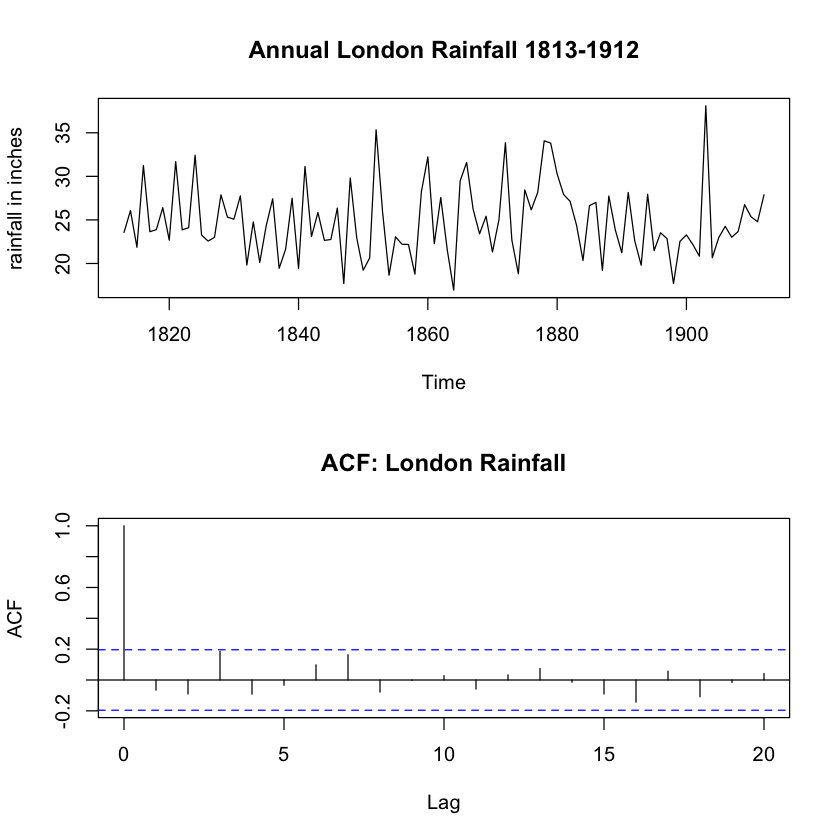

In [8]:
rain.ts <- ts(rain.data, start=c(1813))
par(mfrow=c(2,1))
plot(rain.ts, main="Annual London Rainfall 1813-1912", ylab = 'rainfall in inches')
acf(rain.ts, main="ACF: London Rainfall")

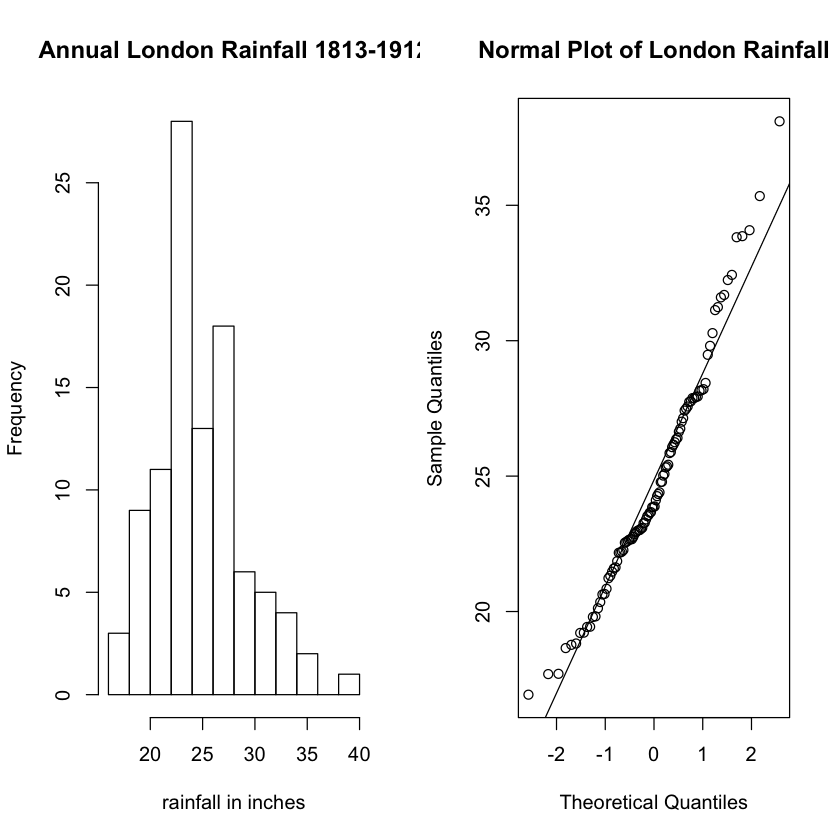

In [9]:
par(mfrow=c(1,2))
hist(rain.data, main="Annual London Rainfall 1813-1912", xlab = 'rainfall in inches')
qqnorm(rain.data, main= "Normal Plot of London Rainfall")
qqline(rain.data)

It’s hard to look at these plots and think of an obvious model. The data themselves exhibit some skew and aren’t terribly far from normally distributed. The autocorrelations seem pretty weak. Even auto.arima() kind of gives up on us.

In [10]:
library(forecast)
auto.arima(rain.ts)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Series: rain.ts 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
         mean
      24.8239
s.e.   0.4193

sigma^2 estimated as 17.76:  log likelihood=-285.25
AIC=574.49   AICc=574.61   BIC=579.7

### SES (Simple Exponential Smoothing)

In [11]:
alpha=.2 #increase alpha for more rapid decay
forecast.values = NULL #establish array to store forecast values
n = length(rain.data)
#naive first forecast
forecast.values [1] = rain.data[1]
#loop to create all forecast values
for( i in 1:n ) {
    forecast.values [i+1] = alpha*rain.data[i] + (1-alpha)* forecast.values [i]
    SSE[k] = sum( (rain.data - forecast.values[1:n])^2 )
}
paste("forecast for time",n+1," = ", forecast.values [n+1])

[1] "forecast for time 101  =  25.3094062064236"

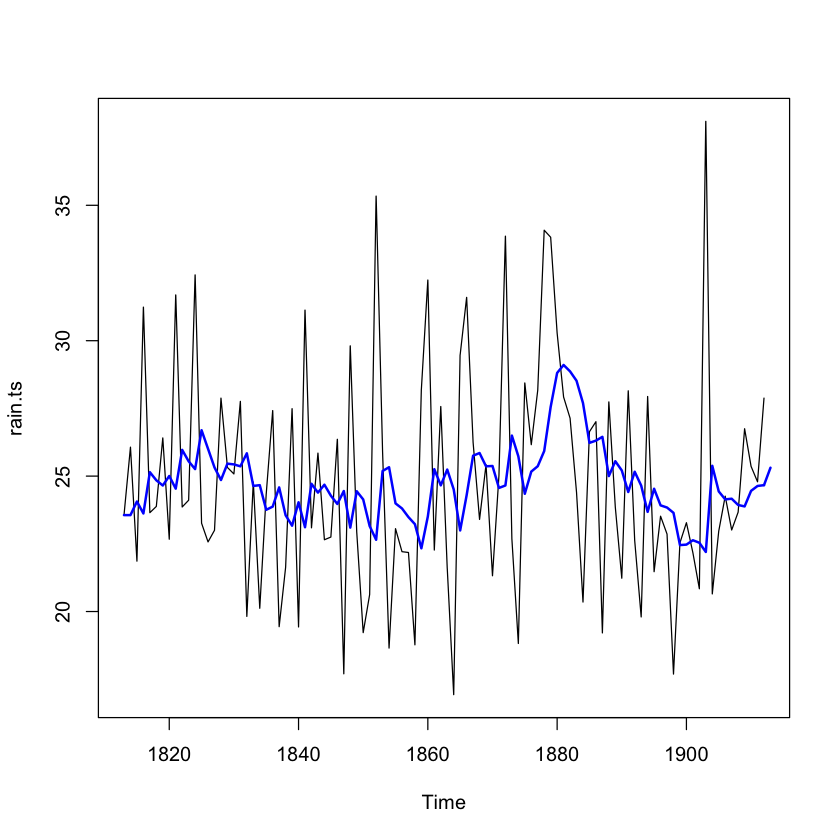

In [20]:
plot(rain.ts)
lines(ts(forecast.values, start=c(1813)), col='blue', lwd=2)

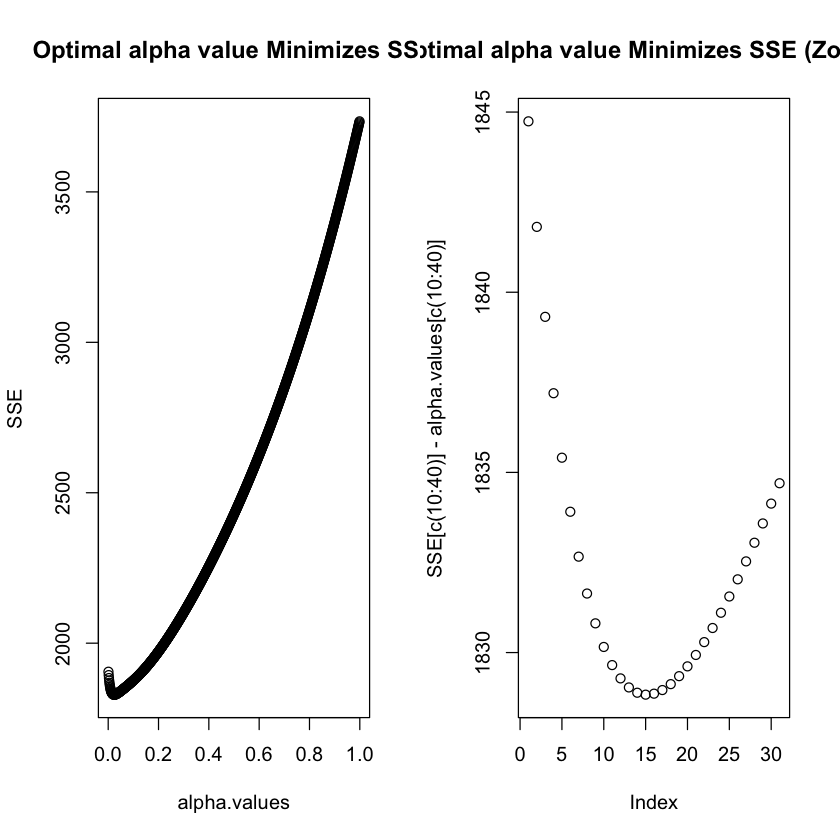

In [25]:
SSE=NULL
n = length(rain.data)
alpha.values = seq( .001, .999, by=0.001)
number.alphas = length(alpha.values)
for( k in 1:number.alphas ) {
forecast.values=NULL
alpha = alpha.values[k]
forecast.values[1] = rain.data[1]
for( i in 1:n ) {
    forecast.values[i+1] = alpha*rain.data[i] + (1-alpha)*forecast.values[i]
    }
    SSE[k] = sum( (rain.data - forecast.values[1:n])^2 )
}
par(mfrow=c(1,2))
plot(SSE~alpha.values, main="Optimal alpha value Minimizes SSE")
plot(SSE[c(10:40)]-alpha.values[c(10:40)], main="Optimal alpha value Minimizes SSE (Zoom in)")

Our best α in terms of minimizing the aggregate squared error is around 0.024 (found by zooming or by “interrogating” the SSE array to find which SSE value is the smallest, then retrieving the corresponding α value.

In [26]:
index.of.smallest.SSE = which.min(SSE) #returns position 24
alpha.values[which.min(SSE)] #returns 0.024

[1] 0.024

[1] "forecast for time 101  =  24.6771392918524"

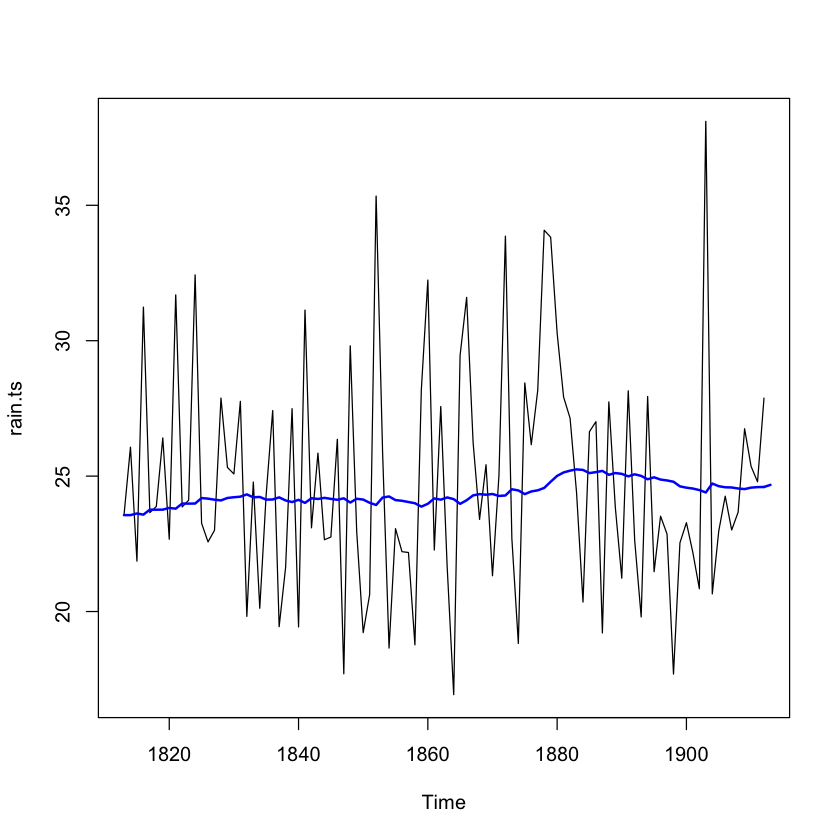

In [27]:
alpha=.024 #increase alpha for more rapid decay
forecast.values = NULL #establish array to store forecast values
n = length(rain.data)
#naive first forecast
forecast.values [1] = rain.data[1]
#loop to create all forecast values
for( i in 1:n ) {
    forecast.values [i+1] = alpha*rain.data[i] + (1-alpha)* forecast.values [i]
    SSE[k] = sum( (rain.data - forecast.values[1:n])^2 )
}
paste("forecast for time",n+1," = ", forecast.values [n+1])
plot(rain.ts)
lines(ts(forecast.values, start=c(1813)), col='blue', lwd=2)

### Automating the previous steps, HoltWinters

In [28]:
HoltWinters(rain.ts, beta=FALSE, gamma=FALSE)

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = rain.ts, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.02412151
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 24.67819